# Important Functions for HMM

## 1 Created a new Obvious-line

In [25]:
# Create new O-line
# L(length):          the length of the Obvious-line
# O(Obvious-line):    a string to save created Obvious-line
# R(red)   :          price up
# G(green) :          price down

import numpy as np

def Create_O(L):
    Status = ["G","R"]
    O = ""
    for i in range (L):
        O = O+Status[np.random.randint(0,2)]
    return O

In [40]:
Obline=Create_O(50)
print("O-line"),
print(Obline)

O-line GRRGGGGRGRRGRRGGGGRRRRGRRRGRGRGGGGGGRGRRGGRRRGGGGR


## 2 Vterbi Algorithm

In [89]:
# Viterbi Algorithm(隐序列推测)
# O(Obvious-line):      the Obvious-line we got at last step 
# LM(Launch Matrix):    a 2*2 matrix to save launch probability
# CM(Change Matrix):    a 2*2 matrix to save change probability

import numpy as np

def Viterbi(O,LM,CM):
    LM = np.log(LM)
    CM = np.log(CM)
    pi=[[1,1]]
    for i in range (1,len(O)):
        pi.append([0,0])
        if O[i] == "R":
            pi[i][0] = LM[0][0]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][0]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
        else:
            pi[i][0] = LM[0][1]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][1]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
    
    if pi[len(O)-1][0] >= pi[len(O)-1][1]:
        H = "U";pr_H = "U"
    else:
        H = "D";pr_H = "D"
    
    for i in range (len(O)-2,-1,-1):
        if pr_H == "D":
            if pi[i][0]+CM[0][1] > pi[i][1]+CM[1][1]:
                pr_H="U"
            else:
                pr_H="D"
        if pr_H=="U":
            if pi[i][0]+CM[0][0] > pi[i][1]+CM[1][0]:
                pr_H="U"
            else:
                pr_H="D"
        H=pr_H+H
        
    return H

In [41]:
CM = [[0.6, 0.4], [0.45, 0.55]]
LM = [[0.9, 0.1], [0.1, 0.9]]
Hdline = Viterbi(Obline,LM,CM)

In [46]:
print("O-line: "),
print(Obline)
print("H-line: "),
print(Hdline)
print("CM      "),
print(CM)
print("LM      "),
print(LM)

O-line:  GRRGGGGRGRRGRRGGGGRRRRGRRRGRGRGGGGGGRGRRGGRRRGGGGR
H-line:  UUUDDDDUDUUDUUDDDDUUUUDUUUDUDUDDDDDDUDUUDDUUUDDDDU
CM       [[0.6, 0.4], [0.45, 0.55]]
LM       [[0.9, 0.1], [0.1, 0.9]]


## 3 Baum-Welch Algorithm

In [90]:
# Baum-Welch Algorithm(参数估计)
# O(Obvious-line):      the Obvious-line we got at last step 
# LM(Launch Matrix):    a 2*2 matrix to save launch probability
# CM(Change Matrix):    a 2*2 matrix to save change probability

def F(x):
    if x == "U":
        return 0
    else:
        return 1
    
def f(x):
    if x == "R":
        return 0
    else:
        return 1
        

def BW(O):
    CM = [[0.6, 0.4], [0.4, 0.6]]
    LM = [[0.6, 0.4], [0.4, 0.6]]
    C = [[0,0],[0,0]]
    L = [[0,0],[0,0]]
    n = 1
    while (C !=CM or L != LM):
        H = Viterbi(O,LM,CM)
        print("Step "),
        print(n)
        print("O-line: "),
        print(O)
        print("H-line: "),
        print(H)
        print("CM      "),
        print(CM)
        print("LM      "),
        print(LM)
        print("\n")
        
        n = n+1
        for i in range (2):
            C[i][0] = CM[i][0]
            C[i][1] = CM[i][1]
            L[i][0] = LM[i][0]
            L[i][1] = LM[i][1]
        for i in range(len(O)-1):
            LM[F(H[i])][f(O[i])]+=1
            CM[F(H[i])][F(H[i+1])]+=1
        LM[F(H[len(O)-1])][f(O[len(O)-1])]+=1
        for i in range (2):
            x=LM[i][0]+LM[i][1]
            LM[i][0] = round(LM[i][0]*1.0/x,5)
            LM[i][1] = round(LM[i][1]*1.0/x,5)
            x=CM[i][0]+CM[i][1]
            CM[i][0] = round(CM[i][0]*1.0/x,5)
            CM[i][1] = round(CM[i][1]*1.0/x,5)
    return LM,CM

In [53]:
BW(Create_O(100))

NameError: name 'Create_O' is not defined

## 4 Test in Real Stock Data

In [86]:
import csv
Data = []
with open('600000.csv','rb') as f:
    reader = csv.reader(f)
    for row in reader:
        Data.append(row)
O = ""
Price = []
for i in range(len(Data)-1):
    if(Data[i+1][1]!="null" and Data[i+1][4]!="null"):
        Price.append(Data[i+1][4])
        if (float(Data[i+1][1])-float(Data[i+1][4])>=0):
            O = O + "R"
        else:
            O = O + "G"

Step  1
O-line:  RGGRRGRRRRRGGRGGRGRRRRGRGGRRRRRRGRGRRRRGRGGGRRRRGRRGRRGRGGGGGGGGGGGGGRRRRGRRGRGRGRGRGRGRRGRRGGRGGRGRRGRGRGGGRRRGGRGRGGRGGRGGGGGGRRRRGRGRGGGRGGRRRGRGRGGRRGGGGRRRGRGRRRRGRGRRGRGGRGRRGRRRGRGRGRRRRRRGRRGR
H-line:  DDDUUUUUUUUDDDDDDDUUUUDDDDUUUUUUUUUUUUUDDDDDUUUUUUUUUUDDDDDDDDDDDDDDDUUUUUUUUUUUUUUUUUUUUUUUDDDDDDDDDDDDDDDDUUUDDDDDDDDDDDDDDDDDUUUUDDDDDDDDDDUUUDDDDDDDDDDDDUUUUUUUUUUUUUUUDDDDDDUUUUUUUUUUUUUUUUUUUUUU
CM       [[0.6, 0.4], [0.4, 0.6]]
LM       [[0.6, 0.4], [0.4, 0.6]]


Step  2
O-line:  RGGRRGRRRRRGGRGGRGRRRRGRGGRRRRRRGRGRRRRGRGGGRRRRGRRGRRGRGGGGGGGGGGGGGRRRRGRRGRGRGRGRGRGRRGRRGGRGGRGRRGRGRGGGRRRGGRGRGGRGGRGGGGGGRRRRGRGRGGGRGGRRRGRGRGGRRGGGGRRRGRGRRRRGRGRRGRGGRGRRGRRRGRGRGRRRRRRGRRGR
H-line:  DDDUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUDDDDDDDDDDDDDDDUUUUUUUUUUUUUUUUUUUUUUUDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU
CM       [[0.91048, 0.08952], [0.10833, 0.89167]]
LM       [[0.77925, 0.22

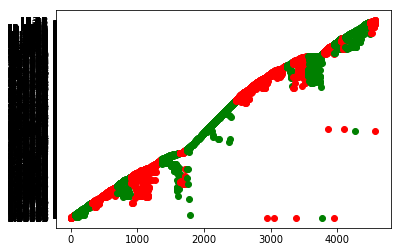

In [91]:
import matplotlib.pyplot as plt
LM,CM = BW(O[0:200])
#CM = [[0.6, 0.4], [0.45, 0.55]]
#LM = [[0.9, 0.1], [0.1, 0.9]]
Hdline = Viterbi(O,LM,CM)
for i in range (len(O)):
    if Hdline[i] == "U":
        plt.plot([i],[Price[i]],'ro')
    elif Hdline[i] == "D":
        plt.plot([i],[Price[i]],'go')
plt.show()

In [71]:
# Test
import numpy as np
CM = [[0.6, 0.4], [0.45, 0.55]]
np.log(CM)

array([[-0.51082562, -0.91629073],
       [-0.7985077 , -0.597837  ]])

In [72]:
np.log(0.6)

-0.5108256237659907